In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('netflix-data-analysis-project')
jovian.set_colab_id('1J3UE-fQwoyNOCH9sR-vjixdA8JYKLAn-')

# Netflix Data Analysis on Movies and TV Shows

### About Netflix:
Netflix is the world's leading media streaming platform, operating in nearly every country in the world. It was one of the very first players in the streaming industry when it made the transition in 2007, and the bet has paid off with hundreds of millions of subscribers around the world.

### Dataset : 
Link: [TV Shows and Movies Listed on Netflix Dataset](https://www.kaggle.com/shivamb/netflix-shows) from Kaggle.

This dataset consist of movies and tvshows available on Netflix.

### Objective : 
In this we are going to perform Some exploratory Data analysis to find some hidden trends and pattern in dataset. will going to load and read the data using pandas, do some cleaning and Processing of data and will explore the dataset through visualizations and graphs using matplotlib and seaborn and finally answers some questions related to dataset.


### What is EDA and Why it is important ?

So first lets understand about EDA and why this stage plays an major role in Data Science Project lifecycle.

*Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data.*

There are no shortcuts in a Data Science project lifecycle. We can’t simply skip to the model building stage after gathering the data. We need to plan our approach in a structured manner and the exploratory data analysis (EDA) stage plays a huge part in that.

Many of us in this field specially beginners, couldn’t wait to dive into machine learning algorithms but that often left our end result hanging in the balance. I discovered, through personal experience and the advice of my mentors, the importance of spending time exploring and understanding the data beacuse it let us know every small points about our data.



## Downloading the Dataset

Let's begin by downloading the data and listing the files within the dataset. here we are downloading the dataset using ***opendatasets*** Python library.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nightsky1598
Your Kaggle Key: ··········


100%|██████████| 1.18M/1.18M [00:00<00:00, 70.5MB/s]

The dataset has been downloaded and extracted.

In [ ]:
data_dir = './netflix-shows'

In [ ]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "netflix-data-analysis-project"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/astha1998/netflix-data-analysis-project


'https://jovian.ai/astha1998/netflix-data-analysis-project'

In [ ]:
# Here we are going to import all the relevant libraires 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

### Loading the Dataset

Now we are ready to load the dataset. will do this using the standard read_csv() function from Pandas. Let's see the structure of data.

In [ ]:
netflix_df = pd.read_csv('./netflix-shows/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Lets just check to confirm that our data is stored as dataframe
type(netflix_df)

pandas.core.frame.DataFrame

## Data Preparation and Cleaning

Now will explore our data in more detail like : 
number of rows and columns peresnt in Dataset, range of values, check and handle missing, incorrect and invalid data and perform some more analysis as per requirment.




### checking the total number of rows and columns in the dataset.

In [ ]:
# using .shape command to check number of rows and columns 
shape = netflix_df.shape
shape

(7787, 12)

### Let's check some more basic information about our data. 

In [ ]:
# using info() method to get the concise summary of the dataframe.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In above summary We can see that there are total 7787 rows and 12 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.

In [ ]:
# if we want to check first and last few rows of dataset we can do this by using head() and tail() function
# head()- returns the first few entries of dataset.
# tail()- returns the last few entries of dataset.
first_few = netflix_df.head(10)
first_few


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [ ]:
last_few = netflix_df.tail(5)
last_few

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


#### Let's see some statistical details of dataset.

In [ ]:
# using describe() method to check some statistical information about the data.
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Handling Null Values

In [ ]:
# Let's check if there is any Null value using isnull() method
netflix_df.isnull().values.any() 

True

In [ ]:
# checking total number of null values column wise.
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# total number of null values in entire dataset.
netflix_titles_df.isnull().sum().sum()

3631

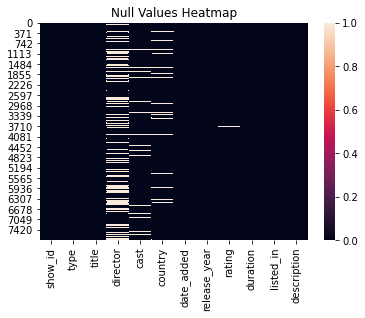

In [ ]:
## this is the visual representation of null values present in data
sns.heatmap(netflix_df.isnull())
plt.title('Null Values Heatmap')
plt.show()

Above we can clearly see that there are some null values in the dataset.
There are total 3631 null values present in the entire dataset out of which 1,2389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added', and 10 under 'rating'. so before diving into EDA we first need to handle all these null values.

In [ ]:
# creating a copy of dataset so that will not affect our original dataset.
netflix_df1 = netflix_df.copy()

Imputation is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. In this mo we will discuss the use of the fillna function from Pandas for this imputation. 

In [ ]:
# dealing will null values
netflix_df1['director'].fillna('No Director', inplace=True)
netflix_df1['cast'].fillna('No Cast', inplace=True)
netflix_df1['country'].fillna('Country Unavailable', inplace=True)
netflix_df1.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
netflix_df1.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

There are multiple ways to deal with null values but in this we simply replaced all the null values with NA. as the two columns 'date_added' and 'rating' are not going to be part of our analysis so will drop the columns.
and from above we can see that there are no more null values in the dataset.

#### Splitting the dataset
As we know that our dataset contain either netflix shows or netflix movies so its better to split our dataset based on these two types. it will be helpful for further analysis.

In [ ]:
netflix_movies_df = netflix_df1[netflix_df1['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [ ]:
netflix_show_df = netflix_df1[netflix_df1['type']=='TV Show'].copy()
netflix_show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/astha1998/netflix-data-analysis-project


'https://jovian.ai/astha1998/netflix-data-analysis-project'

## Exploratory Analysis and Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques.

In this section will try explore our dataset and find some intresting insights with the help of some different graphs and plots.



### Netflix Entertainment type : TV Shows and Movies

Here will explore that which type of content is released by netflix more(i.e TV shoes or movies).

In [ ]:
# Let's check total how many Tv shows and movies are present in the dataset.
netflix_df1['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


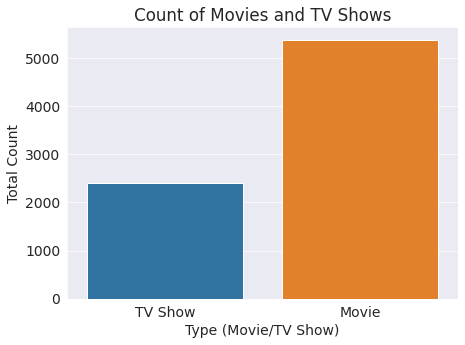

In [ ]:
plt.figure(figsize=(7,5))
g = sns.countplot(netflix_df1.type);
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

So from above visualization we can say that there are roughly 4,000+ movies and almost 2,000 shows with movies being the majority.

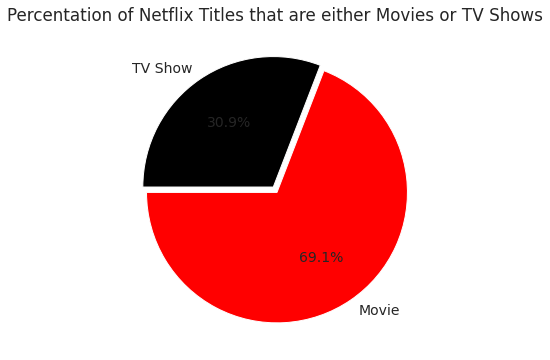

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df1.type.value_counts(),explode=(0.025,0.025),labels=netflix_df1.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

### Most Popular Genres on Netflix


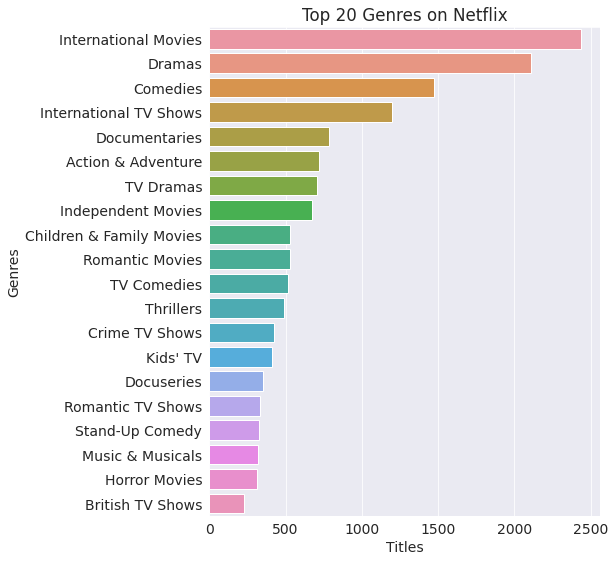

In [ ]:
filtered_genres = netflix_df1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, In terms of genres, international movies tops the list comparatively followed by dramas and comedies.The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

### Top Countries contributor on Netflix

Next is exploring the countries by the amount of the produces content of Netflix. We need to separate all countries within a film before analyzing it, then removing titles with no countries available.


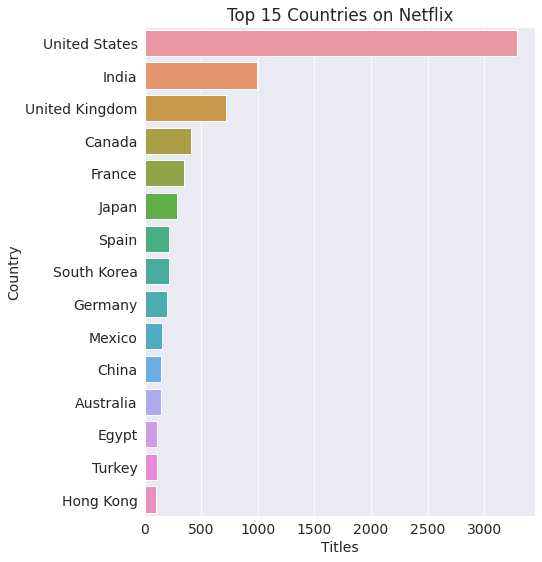

In [ ]:
filtered_countries = netflix_df1.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

From the images above, we can see the top 15 countries contributor to Netflix. The country by the amount of the produces content is the United States followed by India.

### Netflix content By Ratings.

Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


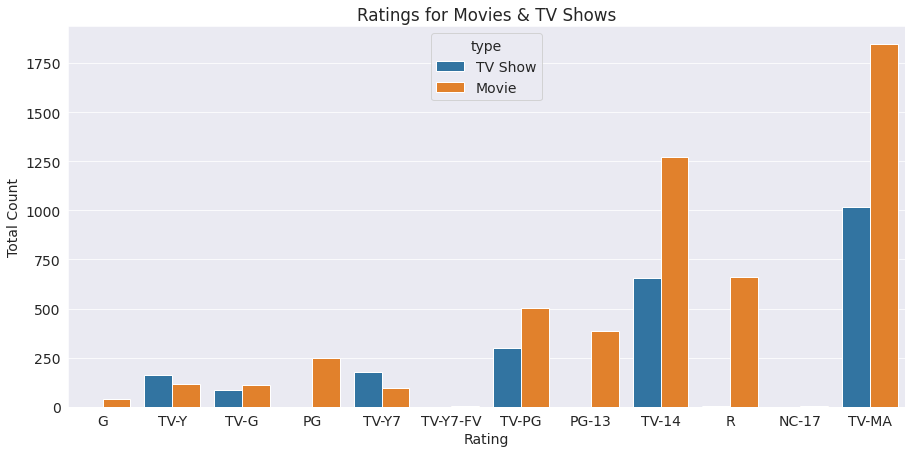

In [ ]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_df1.rating, hue=netflix_df1.type, order=order);
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The largest count of Netflix content is made with a “TV-14” rating. “TV-14” contains material that parents or adult guardians may find unsuitable for children under the age of 14. But the largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/astha1998/netflix-data-analysis-project


'https://jovian.ai/astha1998/netflix-data-analysis-project'

## Asking and Answering Questions

Here will explore some more questions related to our netflix dataset.



### Who are the top 10 Movies actors on Netflix based on number of titles?

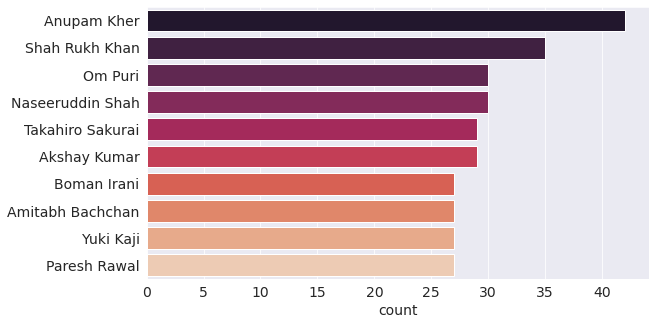

In [ ]:
filtered_cast = netflix_df1[netflix_df1.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

### Who are the top 10 TV Shows actors on Netflix based on number of titles?

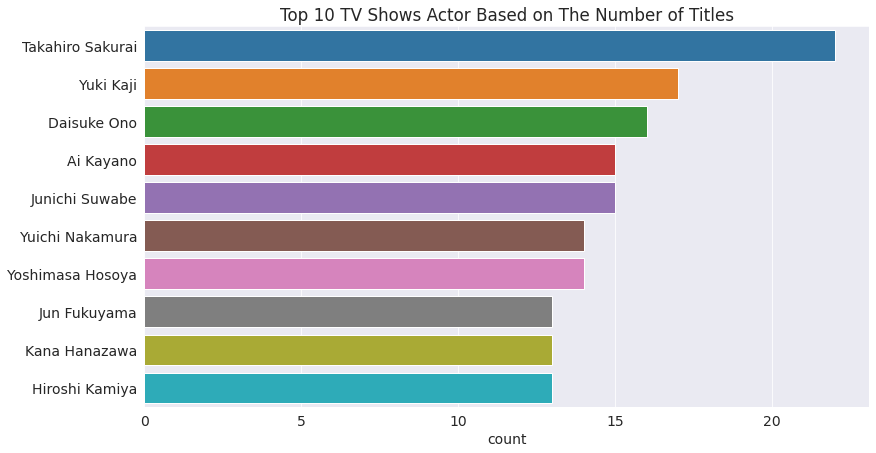

In [ ]:
filtered_cast_shows = netflix_show_df[netflix_show_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 TV Shows Actor Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10])
plt.show()

The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

### Who are the top 10 directors on Netflix with the most releases?

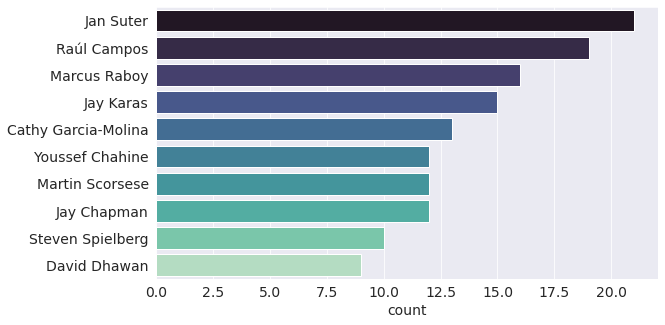

In [ ]:
filtered_directors = netflix_df1[netflix_df1.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

The most popular director on Netflix, with the most titles, is mainly international.

## Inferences and Conclusion

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

1. The most content type on Netflix is movies.

2. The country by the amount of the produces content is the United States,

3. The most popular director on Netflix , with the most titles, is Jan Suter.

4. International Movies is a genre that is mostly in Netflix.

5. largest count of Netflix content is made with a “TV-14” rating.

6. The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai.

7. The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/astha1998/netflix-data-analysis-project


'https://jovian.ai/astha1998/netflix-data-analysis-project'

## References and Future Work

some future projects to work on :
netflix recommendation system and text analysis.

Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy

Analyzing tabular data with Pandas: https://jovian.ml/aakashns/python-pandas-data-analysis

https://www.kaggle.com/shivamb/netflix-shows(link to the dataset and some useful notebooks)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
